# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 645


In [3]:
cities

['ushuaia',
 'gola bazar',
 'bluff',
 'talnakh',
 'hermanus',
 'tsihombe',
 'balykshi',
 'albany',
 'cabo san lucas',
 'hilo',
 'todos santos',
 'atuona',
 'airai',
 'warrington',
 'avarua',
 'ribeira grande',
 'busselton',
 'castro',
 'olafsvik',
 'faya',
 'komsomolskiy',
 'dubbo',
 'zhigansk',
 'palmer',
 'kaitangata',
 'casa nova',
 'comodoro rivadavia',
 'sibu',
 'takoradi',
 'rikitea',
 'parit raja',
 'rawlins',
 'namibe',
 'klyuchi',
 'thompson',
 'kargasok',
 'grindavik',
 'nikolskoye',
 'kavieng',
 'pucara',
 'sebinkarahisar',
 'tzimol',
 'punta arenas',
 'shimoda',
 'halifax',
 'indramayu',
 'souillac',
 'lebu',
 'ostrovnoy',
 'fort-shevchenko',
 'aklavik',
 'kadykchan',
 'barrow',
 'moramanga',
 'hobart',
 'kahului',
 'nanakuli',
 'tasiilaq',
 'upernavik',
 'sorland',
 'honiara',
 'ridgecrest',
 'seminole',
 'qaanaaq',
 'fevralsk',
 'pilar',
 'east london',
 'saskylakh',
 'puerto ayora',
 'mataura',
 'alofi',
 'wageningen',
 'jamestown',
 'taolanaro',
 'vaitupu',
 'thap than'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | gola bazar
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | balykshi
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | todos santos
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | warrington
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | dubbo
Processing Record 23 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,4.81,81,20,0.51,AR,1682469867
1,gola bazar,26.3431,83.3553,26.62,28,99,0.35,IN,1682470035
2,bluff,-46.6000,168.3333,11.56,62,98,7.89,NZ,1682469884
3,talnakh,69.4865,88.3972,-0.44,85,100,0.41,RU,1682469925
4,hermanus,-34.4187,19.2345,14.88,84,100,3.50,ZA,1682470036


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,81,20,0.51,AR,1682469867
1,gola bazar,26.3431,83.3553,26.62,28,99,0.35,IN,1682470035
2,bluff,-46.6000,168.3333,11.56,62,98,7.89,NZ,1682469884
3,talnakh,69.4865,88.3972,-0.44,85,100,0.41,RU,1682469925
4,hermanus,-34.4187,19.2345,14.88,84,100,3.50,ZA,1682470036


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

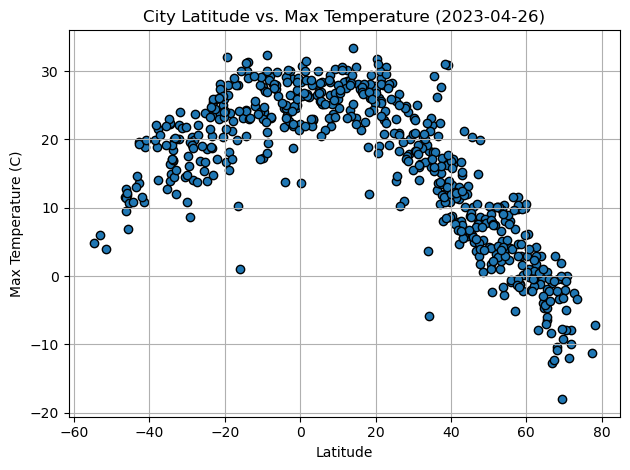

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

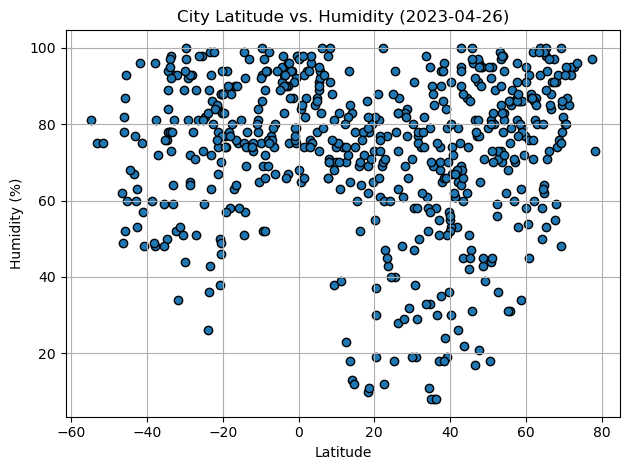

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

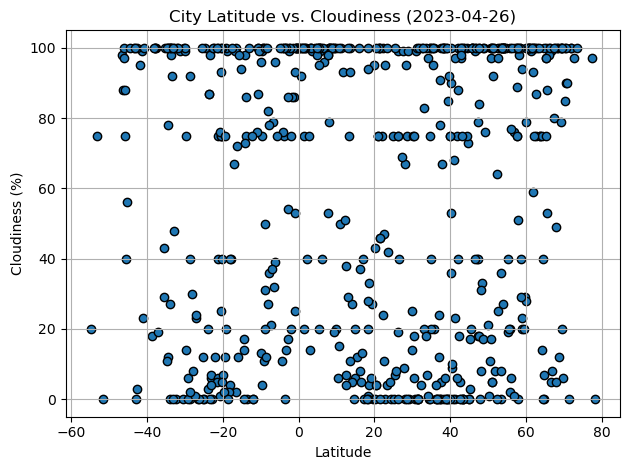

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

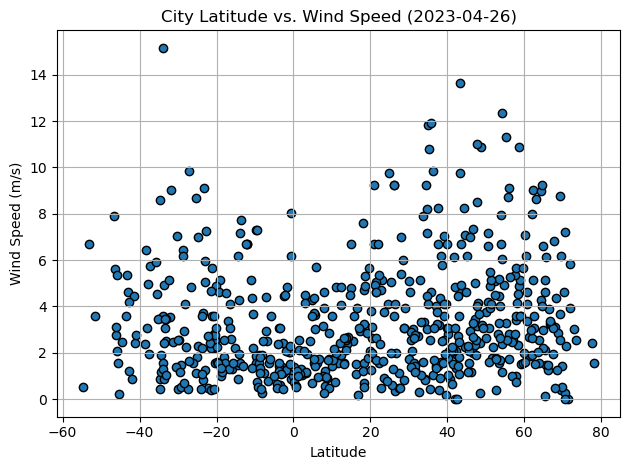

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots

def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gola bazar,26.3431,83.3553,26.62,28,99,0.35,IN,1682470035
3,talnakh,69.4865,88.3972,-0.44,85,100,0.41,RU,1682469925
5,balykshi,47.0667,51.8667,15.00,77,40,5.00,KZ,1682470036
6,albany,42.6001,-73.9662,7.41,67,5,1.92,US,1682469868
7,cabo san lucas,22.8909,-109.9124,30.61,47,0,5.14,MX,1682470004


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,81,20,0.51,AR,1682469867
2,bluff,-46.6000,168.3333,11.56,62,98,7.89,NZ,1682469884
4,hermanus,-34.4187,19.2345,14.88,84,100,3.50,ZA,1682470036
10,atuona,-9.8000,-139.0333,27.64,75,13,7.30,PF,1682470038
11,airai,-8.9266,125.4092,21.10,72,31,1.91,TL,1682469910


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8146734146624101


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

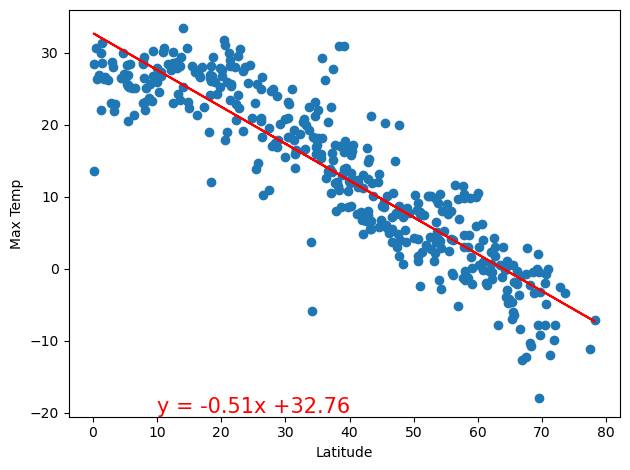

In [37]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",10,-20)
plt.savefig("../output_data/linreg_nh_lat_temp.png")
plt.tight_layout()
plt.plot


The r-value is: 0.45454848290833094


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

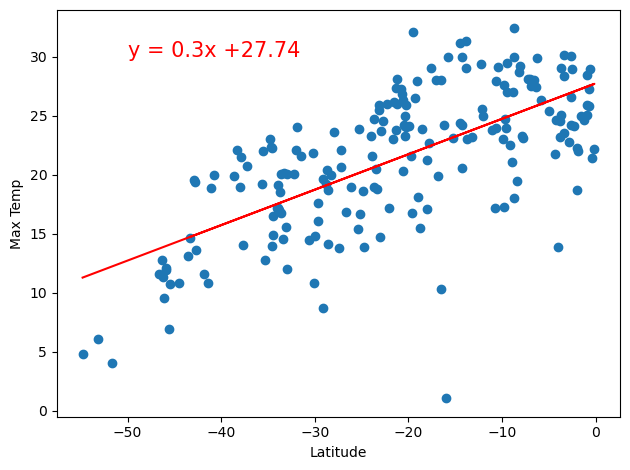

In [38]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-50,30)
plt.savefig("../output_data/linreg_sh_lat_temp.png")
plt.tight_layout()
plt.plot


**Discussion about the linear relationship:** For the Northern Hemisphere, an R-value of 0.81 suggests a strong relationship between latitude and maximum temperature, while for the Southern Hemisphere an R-value of 0.45 suggests a moderate relationship. However, it's important to remember that correlation alone does not imply causation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.014160609566807003


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

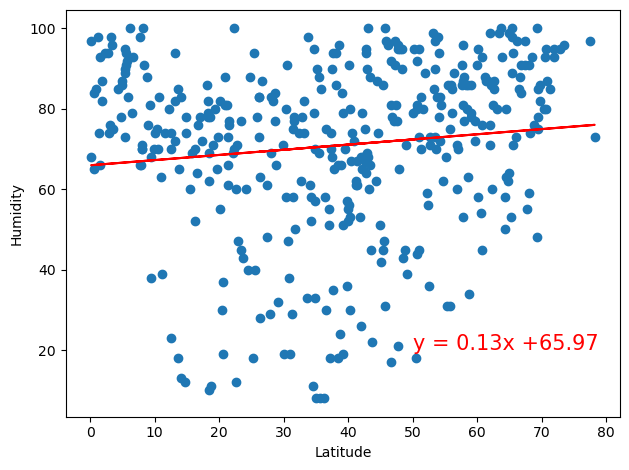

In [39]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",50,20)
plt.savefig("../output_data/linreg_nh_lat_hum.png")
plt.tight_layout()
plt.plot

The r-value is: 0.07683836167292096


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

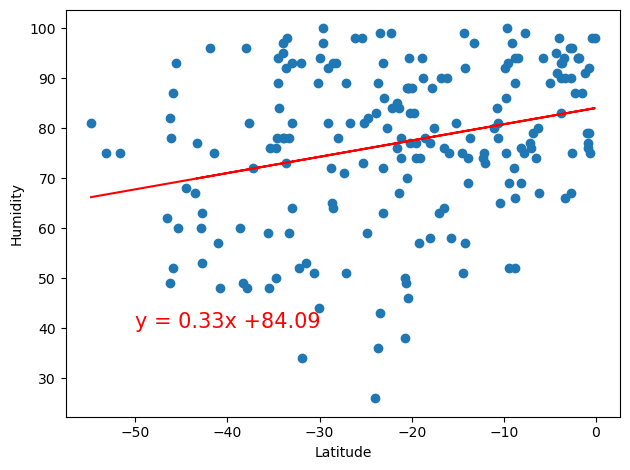

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,40)
plt.savefig("../output_data/linreg_sh_lat_hum.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** For both hemispheres, R-values of 0.01 and 0.08 suggest a weak relationship between latitude and humidity. However, it's important to remember that correlation alone does not imply causation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002956979346410257


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

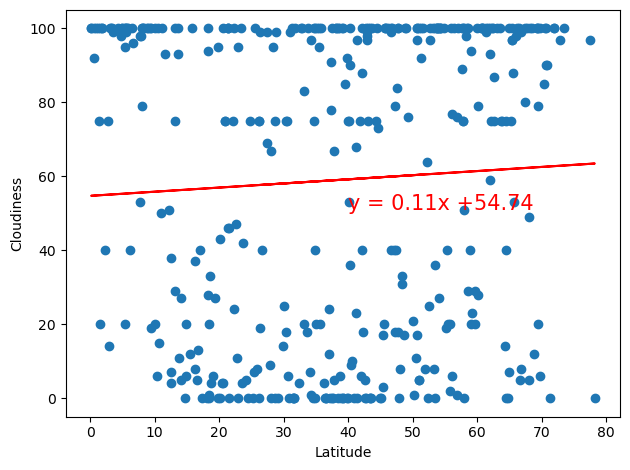

In [41]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,51)
plt.savefig("../output_data/linreg_nh_lat_cld.png")
plt.tight_layout()
plt.plot

The r-value is: 0.001558085125236025


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

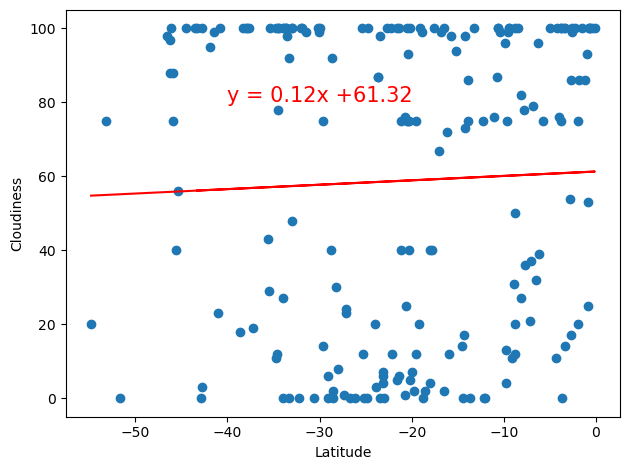

In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-40,80)
plt.savefig("../output_data/linreg_sh_lat_cld.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** For both hemispheres, R-values of 0.003 and 0.002 suggest that the relationship between latitude and cloudiness is technically non-existent. However, it's important to remember that correlation alone does not imply causation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03211261286452435


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

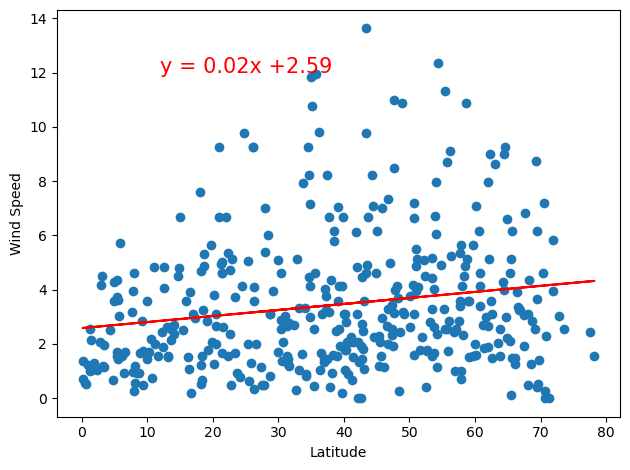

In [43]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",12,12)
plt.savefig("../output_data/linreg_nh_lat_wsp.png")
plt.tight_layout()
plt.plot

The r-value is: 0.03717252021038645


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

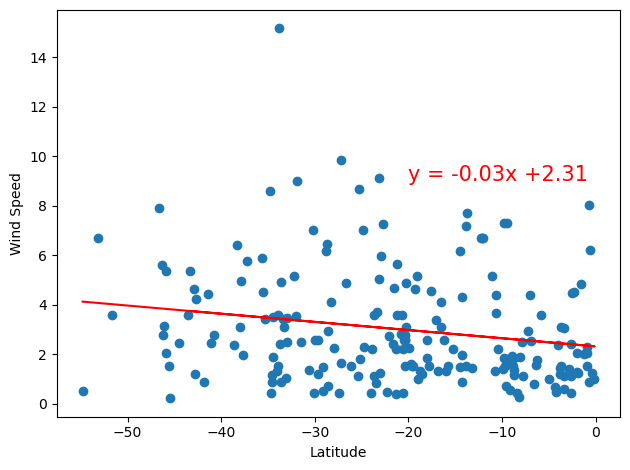

In [44]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-20,9)
plt.savefig("../output_data/linreg_sh_lat_wsp.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** For both hemispheres, R-values of 0.03 suggest a very weak relationship between latitude and wind speed. However, it's important to remember that correlation alone does not imply causation.